**Submission Report**

The selected dataset was the Titanic dataset. 
I was mostly concerned about the survived rate for some particular points of view. 
I did some analyzing on the data, created some age groups so I could work better with the ages and experimented some charts and plots.
I need to remove some null values from ages.
Here is the report:

***TITANIC REPORT***

The Titanic was a ship that no sea could sink. Although no one expected the ship would sink on the first ever travel to the new world, it did. But the main point here is, why so many people died at that day? 
we know, for sure, that Titanic didn't have a board enough life boats to save everyone. But it could have been saved a lot more people. 
We are here to try to understand three main questions.

1. How likely a person was to survive being in the 1st class?
2. Who would have more chances to survive, women or man?
3. Do children were more likely to be saved?

In [48]:
import unicodecsv

#Csv Location
titanic_file = 'titanic_data.csv'

#Reading csv file.
def read_csv(file):
    with open(file, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

titanic_data = read_csv(titanic_file)
print(titanic_data[0])

OrderedDict([('PassengerId', '1'), ('Survived', '0'), ('Pclass', '3'), ('Name', 'Braund, Mr. Owen Harris'), ('Sex', 'male'), ('Age', '22'), ('SibSp', '1'), ('Parch', '0'), ('Ticket', 'A/5 21171'), ('Fare', '7.25'), ('Cabin', ''), ('Embarked', 'S')])


In [49]:
#Getting to know the file. How much rows and columns it has.
titanic_df.shape

(891, 13)

In [50]:
#Getting first 5 rows.
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


In [51]:
import pandas as pd

#Reading CSV with pandas and setting to a variable that will be used later on the report.
titanic_df = pd.read_csv(titanic_file)

In [52]:
#Getting only survived rows and copy to the new dataframe survived_df
survived_df = titanic_df[titanic_df['Survived'].isin([1])].copy()

It is hard to work with ages because, besides the fact that is a number, it's hard to categorize people. So the solution was to create a new field called Age_Category that would use the function cutDF and apply that to the data frame.

In [53]:
#This method will create categories for a range of ages. Ex.: From 0-13 is a Child, 14-18 is a Teenager
def cutDF(df):
    return pd.cut(df,[0, 13, 18, 25, 40, 50, 60, 120], labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'lower_middle', 'upper_middle', 'OAP'])

#Creating new field called Age_Category using the method above to be processed using the apply method.
titanic_df['Age_Category'] = titanic_df[['Age']].apply(cutDF)

In [54]:
#This method calculates the percentage of survival for a specified class that could be (1st class, 2nd class or 3th class).
#p_class is an integer
def percentage_survived(p_class):    
    p_class_frame = titanic_df[titanic_df['Pclass'].isin([p_class])]
    total_class = len(p_class_frame)
    total_survived = p_class_frame.agg({'Survived': 'sum'})
    return (total_survived / total_class) * 100

***Question 1: How likely a person was to survive being in the 1st class?***

For the first question we can answer that being in the 1st class would give you a 62% of chances to survive.

In [55]:
#Those methods use the percentage_survived passing all three classes to see the survival rate for each one.
print('Rate for 1st class {}'.format(percentage_survived(1)))
print('Rate for 2nd class {}'.format(percentage_survived(2)))
print('Rate for 3th class {}'.format(percentage_survived(3)))

Rate for 1st class Survived    62.962963
dtype: float64
Rate for 2nd class Survived    47.282609
dtype: float64
Rate for 3th class Survived    24.236253
dtype: float64


***Who would have more chances to survive, women or man?***

For the second question, it's clear looking at the graphs below that being a woman would be more likely to survive than a man, but being a woman on the 3th class drastically dropped the survival rate.

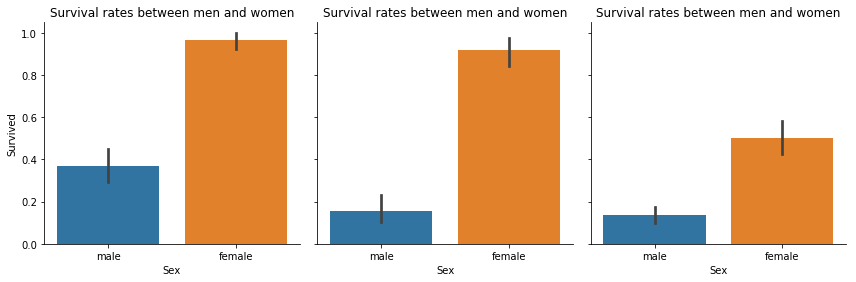

In [56]:
%matplotlib inline
import seaborn as sns

#Create a factor plot using the Sex as X column, Survived as Y column and spliting the data by Pclass. 
#This plot informs the rate of survival for males and females for each Pclass.
factor = sns.factorplot(x="Sex", y="Survived", col="Pclass", data=titanic_df , kind="bar")
factor.set(title="Survival rates between men and women")

The plot above clearly shows that being a woman would improve drasctically the probability of survival even if you were in the 3th class. 

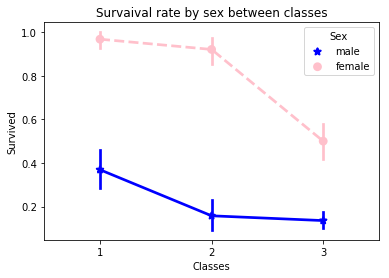

In [57]:
#This plot uses Pclass as x column, Survived as Y column and split by Sex.
plot = sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=titanic_df,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"]);
plot.set(title="Survaival rate by sex between classes", xlabel="Classes", ylabel="Survived")

Here we can see that the rate of survival drops drastically when it comes to 3th class people, but still, being a woman is far better than being man.

***Do children were more likely to be saved?***

For the third question, yes. Children were more likely to be saved even if the children were in the 3th class the survival rate were a lot higher than other ages. But even then, third class passengers were clearly left to die.

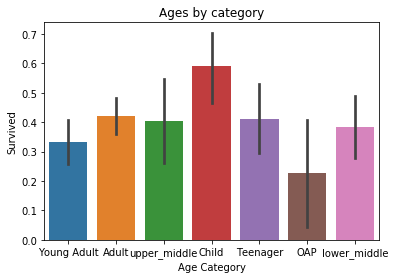

In [58]:
#This bar shows the survival rate by age cateogry.
bar = sns.barplot(data=titanic_df, x= 'Age_Category', y='Survived')
bar.set(title="Ages by category", xlabel='Age Category', ylabel='Survived')

Here we can see the survival rate by age category. It's clearly that being a child would increase the chances to survive.

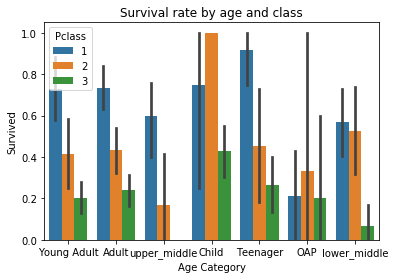

In [59]:
#This bar show the survival rate by age category but it shows for each Pclass.
bar = sns.barplot(data=ex_null_age, x= 'Age_Category', y='Survived', hue='Pclass')
bar.set(title="Survival rate by age and class", xlabel='Age Category', ylabel='Survived')

It's clear that being a first class person is more likely to survive, but being a child would increase your chances even if you are not in the 1st class. What is unexpected is that older people tend to survive even if not in the first class either but the same cannot be said for thirs class passengers.